In [1]:
import pickle
from splits import *

with open('p.pickle', 'rb') as f:
    true_posterior = pickle.load(f)
    
true_posterior

{TreeNode((((0,4),2),1),3): 0.0035996400359964,
 TreeNode((((0,3),4),2),1): 0.009099090090990901,
 TreeNode(0,(1,(2,(3,4)))): 0.04739526047395261,
 TreeNode(0,((1,2),(3,4))): 0.029197080291970802,
 TreeNode(((0,2),(3,4)),1): 0.029197080291970802,
 TreeNode(0,(1,((2,3),4))): 0.019998000199980003,
 TreeNode(0,(((1,2),3),4)): 0.005099490050994901,
 TreeNode((0,(1,2)),(3,4)): 0.013098690130986902,
 TreeNode(((0,(3,4)),2),1): 0.028597140285971403,
 TreeNode(((0,3),(2,4)),1): 0.0201979802019798,
 TreeNode(((0,1),(3,4)),2): 0.012798720127987202,
 TreeNode(0,((1,(3,4)),2)): 0.0313968603139686,
 TreeNode(0,((1,4),(2,3))): 0.019098090190980903,
 TreeNode((0,((2,4),3)),1): 0.022097790220977902,
 TreeNode(0,((1,(2,4)),3)): 0.0103989601039896,
 TreeNode((0,2),(1,(3,4))): 0.019498050194980503,
 TreeNode((((0,3),1),4),2): 0.0035996400359964,
 TreeNode(((0,4),(2,3)),1): 0.0178982101789821,
 TreeNode(0,((1,(2,3)),4)): 0.011698830116988301,
 TreeNode(0,(1,((2,4),3))): 0.023297670232976703,
 TreeNode(((0

In [2]:
all_trees = list(true_posterior.keys())
top_clade = all_trees[0].get_clade()
all_trees

[TreeNode((((0,4),2),1),3),
 TreeNode((((0,3),4),2),1),
 TreeNode(0,(1,(2,(3,4)))),
 TreeNode(0,((1,2),(3,4))),
 TreeNode(((0,2),(3,4)),1),
 TreeNode(0,(1,((2,3),4))),
 TreeNode(0,(((1,2),3),4)),
 TreeNode((0,(1,2)),(3,4)),
 TreeNode(((0,(3,4)),2),1),
 TreeNode(((0,3),(2,4)),1),
 TreeNode(((0,1),(3,4)),2),
 TreeNode(0,((1,(3,4)),2)),
 TreeNode(0,((1,4),(2,3))),
 TreeNode((0,((2,4),3)),1),
 TreeNode(0,((1,(2,4)),3)),
 TreeNode((0,2),(1,(3,4))),
 TreeNode((((0,3),1),4),2),
 TreeNode(((0,4),(2,3)),1),
 TreeNode(0,((1,(2,3)),4)),
 TreeNode(0,(1,((2,4),3))),
 TreeNode(((0,(1,4)),3),2),
 TreeNode(((0,(2,4)),3),1),
 TreeNode((((0,4),2),3),1),
 TreeNode(((0,1),(2,4)),3),
 TreeNode(((0,3),4),(1,2)),
 TreeNode((0,(2,4)),(1,3)),
 TreeNode((0,3),((1,4),2)),
 TreeNode((((0,1),4),3),2),
 TreeNode(((0,1),(2,3)),4),
 TreeNode((((0,3),2),1),4),
 TreeNode((0,((2,3),4)),1),
 TreeNode((((0,2),3),4),1),
 TreeNode(((0,1),3),(2,4)),
 TreeNode(0,(((1,2),4),3)),
 TreeNode(0,(((1,4),2),3)),
 TreeNode((0,2),((1,

In [3]:
with open('split_ps.pickle', 'rb') as f:
    split_ps = pickle.load(f)

clades = list(split_ps.keys())
clade_splits = { clade: list(split_ps[clade].keys()) for clade in clades }
clade_splits

{frozenset({'0',
            '1',
            '2',
            '3',
            '4'}): [Split({'0', '1', '4', '3', '2'}, {'3', '0', '1', '4'}), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1', '4'}), Split({'0', '1', '4', '3', '2'}, {'0'}), Split({'0', '1', '4', '3', '2'}, {'3', '0', '4'}), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '1'}), Split({'0', '1', '4', '3', '2'}, {'0', '4'}), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1'}), Split({'0', '1', '4', '3', '2'}, {'0', '1', '4'}), Split({'0', '1', '4', '3', '2'}, {'0', '2'}), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '4'}), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0'}), Split({'0', '1', '4', '3', '2'}, {'3', '0'}), Split({'0', '1', '4', '3', '2'}, {'0', '1'}), Split({'0', '1', '4', '3', '2'}, {'3', '0', '1'}), Split({'0', '1', '4', '3', '2'}, {'0', '2', '4'})],
 frozenset({'0',
            '1',
            '3',
            '4'}): [Split({'0', '3', '1', '4'}, {'0', '1', '4'}), Split({'3', '0', '1', '4'}, {'3', '0'})

## Analytical variational objective

In [4]:
import autograd.numpy as np

def expectation(distribution, function):
    return np.sum([function(tree)*distribution(tree) for tree in all_trees])

true_posterior_function = lambda tree: true_posterior[tree]
true_log_posterior_function = lambda tree: np.log(true_posterior[tree])
expectation(true_posterior_function, true_log_posterior_function)

-4.323041075555262

In [5]:
   
entropy_func = lambda tree: np.log(tree_split_p(tree, split_ps))
tree_split_p_entropy = lambda split_ps: expectation(lambda tree: tree_split_p(tree, split_ps),
                                                           entropy_func)
tree_split_p_entropy(split_ps)

-4.324265714820227

In [6]:
import autograd

entropy_grad = autograd.grad(tree_split_p_entropy)
entropy_grad(split_ps)

{frozenset({'0',
            '1',
            '2',
            '3',
            '4'}): {Split({'0', '1', '4', '3', '2'}, {'3', '0', '1', '4'}): array(-5.81336802), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1', '4'}): array(-3.89427443), Split({'0', '1', '4', '3', '2'}, {'0'}): array(-3.86561751), Split({'0', '1', '4', '3', '2'}, {'3', '0', '4'}): array(-4.4979108), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '1'}): array(-4.78555052), Split({'0', '1', '4', '3', '2'}, {'0', '4'}): array(-4.33073873), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1'}): array(-4.27132475), Split({'0', '1', '4', '3', '2'}, {'0', '1', '4'}): array(-4.70308048), Split({'0', '1', '4', '3', '2'}, {'0', '2'}): array(-4.64307375), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '4'}): array(-5.9068123), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0'}): array(-4.71492888), Split({'0', '1', '4', '3', '2'}, {'3', '0'}): array(-4.10028819), Split({'0', '1', '4', '3', '2'}, {'0', '1'}): array(-4.80412184), S

In [7]:
energy_func = lambda tree: np.log(true_posterior[tree])
tree_split_p_energy = lambda split_ps: expectation(lambda tree: tree_split_p(tree, split_ps),
                                                  energy_func)
tree_split_p_energy(split_ps)

-5.100185523604863

In [8]:
energy_grad = autograd.grad(tree_split_p_energy)
energy_grad(split_ps)

{frozenset({'0',
            '1',
            '2',
            '3',
            '4'}): {Split({'0', '1', '4', '3', '2'}, {'3', '0', '1', '4'}): array(-5.16138675), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1', '4'}): array(-5.86184491), Split({'0', '1', '4', '3', '2'}, {'0'}): array(-4.49985293), Split({'0', '1', '4', '3', '2'}, {'3', '0', '4'}): array(-4.50882395), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '1'}): array(-6.13489513), Split({'0', '1', '4', '3', '2'}, {'0', '4'}): array(-5.02502881), Split({'0', '1', '4', '3', '2'}, {'0', '2', '1'}): array(-4.44332492), Split({'0', '1', '4', '3', '2'}, {'0', '1', '4'}): array(-4.94658333), Split({'0', '1', '4', '3', '2'}, {'0', '2'}): array(-4.66205192), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0', '4'}): array(-4.17208225), Split({'0', '1', '4', '3', '2'}, {'3', '2', '0'}): array(-4.89311641), Split({'0', '1', '4', '3', '2'}, {'3', '0'}): array(-4.7805937), Split({'0', '1', '4', '3', '2'}, {'0', '1'}): array(-4.30396863), 

## Test sampling

In [9]:
from tqdm import tqdm_notebook as tqdm

n_test_samples = 100000
sample_counts = { tree: 0 for tree in all_trees }

for _ in tqdm(range(n_test_samples)):
    sample_counts[sample_tree(top_clade, split_ps)] += 1

sample_counts

{TreeNode((((0,4),2),1),3): 716,
 TreeNode((((0,3),4),2),1): 95,
 TreeNode(0,(1,(2,(3,4)))): 497,
 TreeNode(0,((1,2),(3,4))): 2855,
 TreeNode(((0,2),(3,4)),1): 326,
 TreeNode(0,(1,((2,3),4))): 723,
 TreeNode(0,(((1,2),3),4)): 3119,
 TreeNode((0,(1,2)),(3,4)): 2144,
 TreeNode(((0,(3,4)),2),1): 150,
 TreeNode(((0,3),(2,4)),1): 353,
 TreeNode(((0,1),(3,4)),2): 359,
 TreeNode(0,((1,(3,4)),2)): 519,
 TreeNode(0,((1,4),(2,3))): 1928,
 TreeNode((0,((2,4),3)),1): 448,
 TreeNode(0,((1,(2,4)),3)): 2049,
 TreeNode((0,2),(1,(3,4))): 691,
 TreeNode((((0,3),1),4),2): 145,
 TreeNode(((0,4),(2,3)),1): 394,
 TreeNode(0,((1,(2,3)),4)): 957,
 TreeNode(0,(1,((2,4),3))): 1183,
 TreeNode(((0,(1,4)),3),2): 415,
 TreeNode(((0,(2,4)),3),1): 357,
 TreeNode((((0,4),2),3),1): 249,
 TreeNode(((0,1),(2,4)),3): 1724,
 TreeNode(((0,3),4),(1,2)): 935,
 TreeNode((0,(2,4)),(1,3)): 946,
 TreeNode((0,3),((1,4),2)): 1174,
 TreeNode((((0,1),4),3),2): 323,
 TreeNode(((0,1),(2,3)),4): 932,
 TreeNode((((0,3),2),1),4): 252,
 Tr

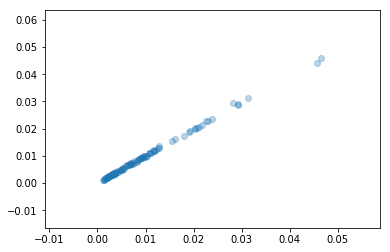

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_proportions = [sample_counts[tree]/n_test_samples for tree in all_trees]
distr_ps = [tree_split_p(tree, split_ps) for tree in all_trees]

plt.scatter(distr_ps, sample_proportions, alpha=0.3)

## MC estimators

In [11]:
n_samples = 100000

def mc_expectation(sampler, function, *sampler_args, n_samples=1, progress=False):
    range_ = tqdm(range(n_samples)) if progress else range(n_samples)
    return np.mean([function(sampler(*sampler_args)) for _ in range_])

mc_expectation(sample_tree, entropy_func, top_clade, split_ps, n_samples=n_samples, progress=True), tree_split_p_entropy(split_ps)

(-4.322263045242932, -4.324265714820227)

In [12]:
mc_expectation(sample_tree, energy_func, top_clade, split_ps, n_samples=n_samples, progress=True), tree_split_p_energy(split_ps)

(-5.099230247063707, -5.100185523604863)

In [ ]:
def score_function_estimator(sampler, function, log_dens_grad, params, n_samples=1):
    samples = [sampler(params) for _ in range(n_samples)]
    func_vals = [function(sample) for sample in samples]
    grad_vals = [log_dens_grad(sample, params) for sample in samples]
    scaled = [split_dict_apply(clades, clade_splits, lambda x: x*func_val, grad_val)
              for func_val, grad_val in zip(func_vals, grad_vals)]
    return split_dict_zip_apply(clades, clade_splits, lambda x: sum(x)/n_samples, scaled)

sampler = lambda split_ps: sample_tree(top_clade, split_ps)
log_dens_grad = autograd.grad(lambda tree, split_ps : np.log(tree_split_p(tree, split_ps)), argnum=1)
grad_est = score_function_estimator(sampler, energy_func, log_dens_grad, split_ps, n_samples=100000)
grad_est

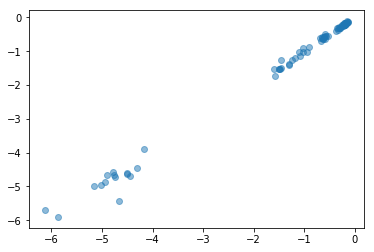

In [34]:
actual_grad = energy_grad(split_ps)
grad_est_vals = [grad_est[clade][split] for clade in clades for split in clade_splits[clade]]
actual_grad_vals = [actual_grad[clade][split] for clade in clades for split in clade_splits[clade]]
plt.scatter(actual_grad_vals, grad_est_vals, alpha=0.5)